In [1]:
import numpy as np
import pickle
import cv2
import tensorflow as tf
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras import backend as k
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Input,Add,Flatten,AveragePooling2D,Dense,BatchNormalization,ZeroPadding2D,Activation,Dropout
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
EPOCHS = 15
BS = 32
image_size=256
channels=3
directory_root = 'E:/Projects/Smart-Plant-Health-Monitoring-System/PlantVillage'

In [3]:
dataset=tf.keras.utils.image_dataset_from_directory(
    directory_root,
    shuffle=True,
    batch_size=BS,
    image_size=(image_size, image_size),
)

Found 22348 files belonging to 16 classes.


In [4]:
class_names=dataset.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy',
 'cotton']

In [5]:
len(dataset)

699

In [6]:
def get_dataset_size(dataset,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(dataset)
    if shuffle:
        ds=dataset.shuffle(shuffle_size,seed=12)
    train_size=int(train_split *ds_size)
    val_size=int(val_split*ds_size)
    train_ds=dataset.take(train_size)
    val_ds=dataset.skip(train_size).take(val_size)
    test_ds=dataset.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [7]:
train_ds,val_ds,test_ds=get_dataset_size(dataset)

In [8]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [9]:
resize_and_rescale=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(image_size,image_size),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [10]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [11]:
import tensorflow as tf
from tensorflow.keras import layers

input_shape = (BS, image_size, image_size, channels)
n_classes = 16

model = tf.keras.models.Sequential([
    resize_and_rescale,
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)


In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BS,   
    verbose=1,
    validation_data=val_ds
)

Epoch 1/15


559/559 [==============================] - 2842s 4s/step - loss: 1.8514 - accuracy: 0.4007 - val_loss: 1.2696 - val_accuracy: 0.5856
Epoch 2/15
559/559 [==============================] - 1684s 3s/step - loss: 0.9146 - accuracy: 0.6996 - val_loss: 0.6583 - val_accuracy: 0.7871
Epoch 3/15
559/559 [==============================] - 1478s 3s/step - loss: 0.5794 - accuracy: 0.8042 - val_loss: 0.6041 - val_accuracy: 0.8066
Epoch 4/15
559/559 [==============================] - 1605s 3s/step - loss: 0.4457 - accuracy: 0.8507 - val_loss: 0.5264 - val_accuracy: 0.8361
Epoch 5/15
559/559 [==============================] - 1509s 3s/step - loss: 0.3745 - accuracy: 0.8735 - val_loss: 0.3972 - val_accuracy: 0.8691
Epoch 6/15
559/559 [==============================] - 1642s 3s/step - loss: 0.3229 - accuracy: 0.8910 - val_loss: 0.3859 - val_accuracy: 0.8809
Epoch 7/15
559/559 [==============================] - 1713s 3s/step - loss: 0.3008 - accuracy: 0.8999 - val_loss: 0.3853 - val_accurac

In [15]:
scores=model.evaluate(test_ds)

71/71 [==============================] - 721s 453ms/step - loss: 0.2207 - accuracy: 0.9258


In [16]:
scores

[0.22069203853607178, 0.9258437156677246]

In [17]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training & Validation Accuracy')

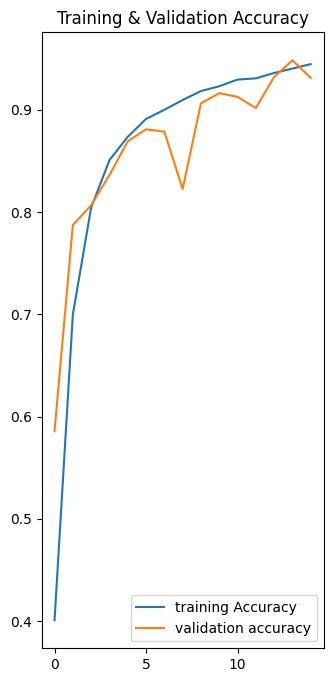

In [18]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.title('Training & Validation Accuracy')

First image to predict
First image Actual label name : Tomato_Late_blight
1/1 [==============================] - 8s 8s/step
[1.1013044e-03 1.8165208e-08 1.6023258e-03 2.4135999e-05 2.0204418e-13
 5.4571192e-05 8.5850872e-02 7.8352746e-03 3.2662138e-05 9.0186429e-01
 1.2639379e-06 1.5069600e-03 2.6312544e-10 3.0963772e-08 8.8149186e-09
 1.2623140e-04]
9
Prediction label:  Tomato_Septoria_leaf_spot


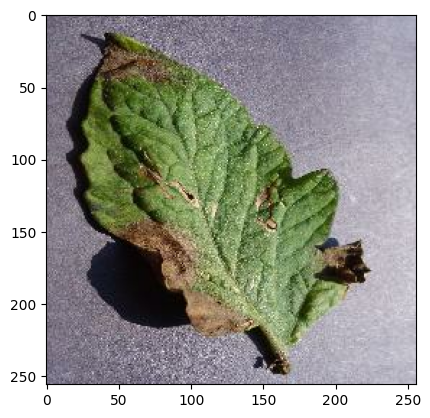

In [19]:
for images_batch,labels_batch in test_ds.take(1):
    first_image= images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0]
    print("First image to predict")
    plt.imshow(first_image)
    print("First image Actual label name :", class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print(batch_prediction[0])
    print(np.argmax(batch_prediction[0]))
    print("Prediction label: ",class_names[np.argmax(batch_prediction[0])])

In [20]:
# Save the model as HDF5 file
model_hdf5_path = "E:/Projects/Smart-Plant-Health-Monitoring-System/model.h5"
model.save(model_hdf5_path)
print("Model saved as HDF5 file:", model_hdf5_path)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved as HDF5 file: E:/Projects/Smart-Plant-Health-Monitoring-System/model.h5


In [21]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0) 
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 94ms/step


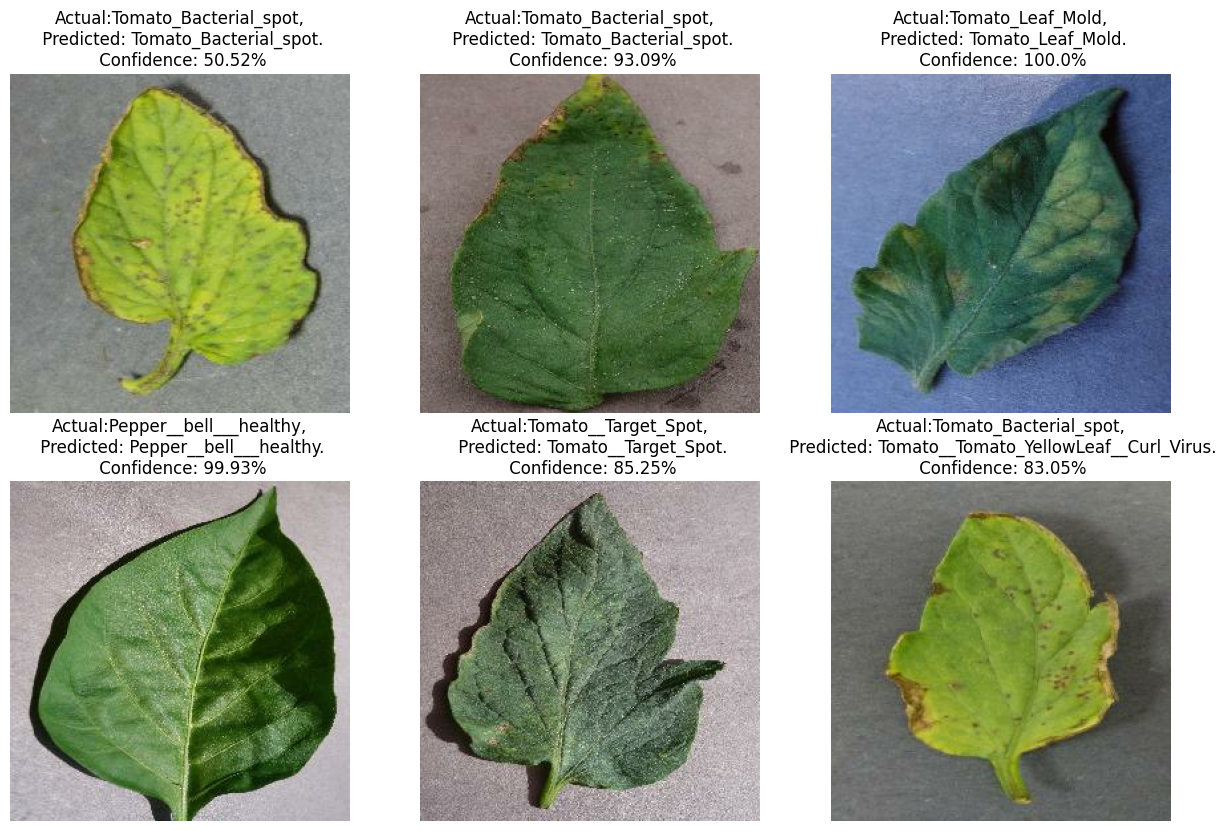

In [25]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(6):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidence = predict(model, images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [23]:
# Load the model from HDF5 file
loaded_model_hdf5 = tf.keras.models.load_model(model_hdf5_path)
print("Model loaded from HDF5 file:", model_hdf5_path)


# Test the loaded model with a sample image
sample_image_path = "E:/Projects/Smart-Plant-Health-Monitoring-System/PlantVillage/Pepper__bell___Bacterial_spot/0a0dbf1f-1131-496f-b337-169ec6693e6f___NREC_B.Spot 9241.JPG" # Provide the path to your sample image
sample_image = tf.keras.preprocessing.image.load_img(sample_image_path, target_size=(image_size, image_size))
sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)
sample_image = np.expand_dims(sample_image, axis=0)

# Predict using the model loaded from HDF5 file
predictions_hdf5 = loaded_model_hdf5.predict(sample_image)
predicted_class_hdf5 = class_names[np.argmax(predictions_hdf5[0])]
print("Predicted class (HDF5):", predicted_class_hdf5)

Model loaded from HDF5 file: E:/Projects/Smart-Plant-Health-Monitoring-System/model.h5
1/1 [==============================] - 0s 467ms/step
Predicted class (HDF5): Pepper__bell___Bacterial_spot


In [24]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
